In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/2020.deeplearning/master/init.py
from init import init; init(force_download=False)

replicating local resources


In [0]:
#!python -m spacy download en_core_web_lg

In [85]:
#%% Import Libraries
import string
import spacy
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem.porter import PorterStemmer
from nltk import wordpunct_tokenize
import re
import gensim.downloader as api
#import en_core_web_lg
import pandas as pd

#%% noPunctuation
def noPunctuation(text):
         
    text= [char for char in text if char not in string.punctuation]
    nopunctuation=''.join(text)
           
    nopunctuation.split()

    return nopunctuation
#%%

def noPunctuationExtra(text):    
    texttoP=text
    forbidden1 = ('?', '¿', '¡', '!', ',', '.', ';', ':','xxxx')
    for i in range (len(forbidden1)):    
        idx=[n for n in range(len(texttoP)) if text.find(forbidden1[i], n) == n]
        if len(idx)!=0:
            for j in range(len(idx)):
                texttoP=texttoP.replace(texttoP[idx[j]],' ')
    return texttoP

#%%
def removeNumbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    
    return text

#%% StopWordsRemoval
def StopWordsRemoval(text):

    stopwords_aux = stopwords.words('english')
    #stopwords_aux.append('us')
    #Now eliminate stopwords
    clean_sentence= [word for word in text.split() if word.lower() not in stopwords_aux]
    clean_sentence=' '.join(clean_sentence)

    return clean_sentence

#%% Lemmatizer
#nlp = spacy.load('en_core_web_lg')
#nlp = en_core_web_lg.load()

def Lemmatizer(text,language='english'):

    doc = nlp(text)
    tokenLemma=[]
    for token in doc:
        #print(token, token.lemma, token.lemma_)
        if (token.lemma_ =="-PRON-"):
            tokenLemma.append(token.text)
        else:
            tokenLemma.append(token.lemma_)
    tokenLemma=' '.join(tokenLemma)
    return tokenLemma

              
#%% toLowerCase
def toLowerCase(text):
    text=text.lower()
    return text

#%% remove 'um' and 'uh'
def muletsRemoval(text):
    text=text.replace(' XXXX',"")
    text=text.replace(' um',"")
    text=text.replace(' Um',"")
    text=text.replace(' uh',"")
    text=text.replace(' Uh',"")

    return text

## Clean text of unique characters
def CleanText(text):
    text_split=  text.split()  
    aux=[]
    for i in range(0,len(text_split)):
        if (len(text_split[i])>=2):
            aux.append(text_split[i])
    cleantext=' '.join(aux)
    return(cleantext)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
!wget nc https://github.com/cristianru31/dataset_U5/blob/master/data_U5.zip?raw=true -O data_U5.zip 
!unzip data_U5.zip

--2020-06-08 20:52:10--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2020-06-08 20:52:10--  https://github.com/cristianru31/dataset_U5/blob/master/data_U5.zip?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cristianru31/dataset_U5/raw/master/data_U5.zip [following]
--2020-06-08 20:52:10--  https://github.com/cristianru31/dataset_U5/raw/master/data_U5.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cristianru31/dataset_U5/master/data_U5.zip [following]
--2020-06-08 20:52:10--  https://raw.githubusercontent.com/cristianru31/dataset_U5/master/data_U5.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.12

In [86]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import os #Interfaz Python-Sistema Operativo

#%%

#Function to preprocess the data
def preprocess(text):
    #text = toLowerCase(text)
    
    text = muletsRemoval(text)
    
    text = noPunctuation(text)

    text = noPunctuationExtra(text)
    
    text = removeNumbers(text)

    #text = StopWordsRemoval(text)

    #text = Lemmatizer(text)
    
    text = CleanText(text)
    return text

#%%
# LOAD DATA
route='./transcripts/'
file_list = os.listdir(route) 
file_list.sort()

#%%
#Preprocess data
start_time = time()
print(start_time)
print("--"*20+"Preprocessing starts"+"--"*20)


texts_preprocessed=[]

for file in file_list:
    text = (open(route+file)).read()
    text = " ".join(text.split())
    text_pre = preprocess(text)
    text_pre = " ".join(text_pre.split())#Para remover espacios blancos indeseados
    texts_preprocessed.append(text_pre)
    print("--"*10+ file+" Ready"+"--"*10)

print("--"*20+"Preprocessing ends"+"--"*20)

elapsed_time = time() - start_time
print("Tiempo tomado para preprocesar: %0.10f seconds." % elapsed_time)

1591654832.162573
----------------------------------------Preprocessing starts----------------------------------------
--------------------VLOG1.txt Ready--------------------
--------------------VLOG10.txt Ready--------------------
--------------------VLOG100.txt Ready--------------------
--------------------VLOG102.txt Ready--------------------
--------------------VLOG103.txt Ready--------------------
--------------------VLOG104.txt Ready--------------------
--------------------VLOG105.txt Ready--------------------
--------------------VLOG106.txt Ready--------------------
--------------------VLOG107.txt Ready--------------------
--------------------VLOG108.txt Ready--------------------
--------------------VLOG109.txt Ready--------------------
--------------------VLOG11.txt Ready--------------------
--------------------VLOG110.txt Ready--------------------
--------------------VLOG111.txt Ready--------------------
--------------------VLOG112.txt Ready--------------------
---------------

In [87]:
texts_preprocessed[4]

'Hi its and this is just quick little update to let you know how Im doing went to retreat with the church last weekend and when got up there couldnt eat anything my dont know if it was like the altitude or like what but my band got really tight and couldnt eat anything When came back my weight was down to on seventy seven and then after couple of days of being home then my weight started to get back to normal but still couldnt eat so had to go back to see my surgeon and get little bit of food out of my band and they took out one cc putting me at four point two Everybody this is Im on my retreat right now got here last night It was it was dark when got here so came last year but this year came with the intentions of running in the mornings Well last night was all pumped looking to get up early this morning and run so get up early earlier than Id like to at least start running Before know it Im going downhill and suddenly Im going uphill Its cold and my Central Valley California self is 

In [6]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 1.x
import tensorflow as tf
tf.__version__

setting tensorflow version in colab
TensorFlow 1.x selected.


'1.15.2'

In [0]:
import tensorflow_hub as hub
import tensorflow as tf

In [8]:
!pip install seqeval[cpu]

  Created wheel for seqeval: filename=seqeval-0.0.12-cp36-none-any.whl size=7424 sha256=b29cb8d8797675d1d2218c98d6f211d8cc2a589a9eba4958ba948afe09faba91
  Stored in directory: /root/.cache/pip/wheels/4f/32/0a/df3b340a82583566975377d65e724895b3fad101a3fb729f68
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=b86cbca4db99a6e7318f4e4ff527c2d9c4c4d28f9e24d3f94ea66c7243adc58d
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built seqeval gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


In [0]:
new_texts = []
for i in range(len(texts_preprocessed)):
  new_texts.append(texts_preprocessed[i].split(" "))

In [89]:
largest_sen = max(len(sen) for sen in new_texts)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 1886 words


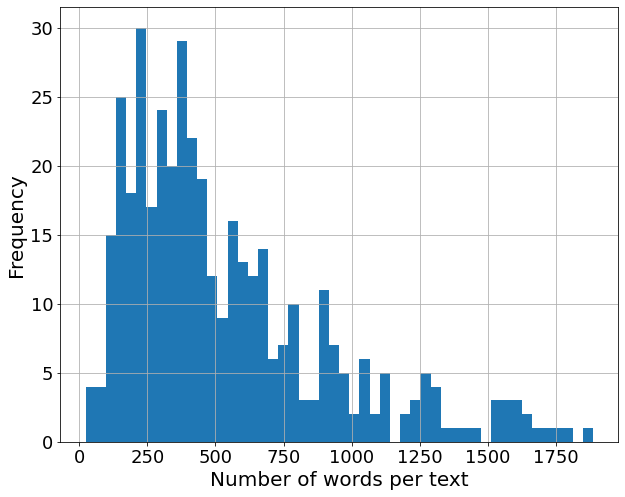

In [90]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.hist([len(sen) for sen in new_texts], bins= 50)
plt.xlabel('Number of words per text',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.grid()
plt.tick_params(labelsize=18)
plt.savefig('Histogram.png')
plt.show()

### Modify the following parameter to obtain results with different maximun number of words per text.

In [0]:
max_len = 300

In [13]:
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K

Using TensorFlow backend.


This is how we have to define the layer in order to be used in the model (In TF 2.x this should not be necessary [take a look to this guide](https://www.tensorflow.org/hub)):

In [0]:
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda, add, Flatten, BatchNormalization
from keras.layers.merge import Concatenate
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

In [15]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip    

--2020-06-08 20:52:31--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-06-08 20:52:31--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-06-08 20:52:32--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_words = 5000

tokenizer = Tokenizer(num_words = max_words+1)# Only the most common 'num_words - 1' words will be kept
tokenizer.fit_on_texts(new_texts) 
data_aux = tokenizer.texts_to_sequences(new_texts)
print(tokenizer.word_index) # Dictionary

data_new = pad_sequences(data_aux, padding="post", maxlen=max_len) # it is necesary because tensor must have the same lenght.
# Texts with lower words than the max number of words in all the texts have to be complete with zeros.
print(data_new)

temp = len(data_new[0])
for i in range(len(data_new)):
  maximo = len(data_new[i])
  if(maximo>temp):
    temp = maximo
maxwords = temp
print("Maximo número de palabras: ", temp)

{'and': 1, 'the': 2, 'to': 3, 'you': 4, 'that': 5, 'it': 6, 'of': 7, 'so': 8, 'like': 9, 'is': 10, 'my': 11, 'in': 12, 'im': 13, 'know': 14, 'this': 15, 'its': 16, 'but': 17, 'just': 18, 'was': 19, 'for': 20, 'on': 21, 'have': 22, 'me': 23, 'be': 24, 'really': 25, 'not': 26, 'dont': 27, 'do': 28, 'all': 29, 'what': 30, 'because': 31, 'one': 32, 'if': 33, 'with': 34, 'about': 35, 'going': 36, 'or': 37, 'we': 38, 'they': 39, 'out': 40, 'are': 41, 'yeah': 42, 'there': 43, 'thats': 44, 'get': 45, 'can': 46, 'people': 47, 'now': 48, 'up': 49, 'at': 50, 'think': 51, 'as': 52, 'go': 53, 'video': 54, 'then': 55, 'see': 56, 'well': 57, 'your': 58, 'when': 59, 'got': 60, 'want': 61, 'them': 62, 'he': 63, 'been': 64, 'right': 65, 'some': 66, 'ive': 67, 'good': 68, 'had': 69, 'from': 70, 'time': 71, 'were': 72, 'gonna': 73, 'would': 74, 'guys': 75, 'will': 76, 'which': 77, 'how': 78, 'oh': 79, 'two': 80, 'lot': 81, 'okay': 82, 'make': 83, 'no': 84, 'here': 85, 'more': 86, 'little': 87, 'youre': 88

In [0]:
from collections import Counter
vocab = Counter()
for i in range(len(new_texts)):
  vocab.update(new_texts[i])

In [0]:
word_index = {t[0]: i+1 for i,t in enumerate(vocab.most_common(max_words))}

In [0]:
emb_dim = 300
embeddings_index = {}
f = open('glove.6B.'+str(emb_dim)+'d.txt')
for line in f:
  values = line.split()
  word = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

embedding_matrix = np.zeros((len(word_index), emb_dim))
for word, i in word_index.items():
    if i >= max_words:
      continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [20]:
word_index.items()

dict_items([('and', 1), ('to', 2), ('the', 3), ('you', 4), ('that', 5), ('of', 6), ('it', 7), ('like', 8), ('is', 9), ('Im', 10), ('in', 11), ('my', 12), ('know', 13), ('this', 14), ('so', 15), ('was', 16), ('just', 17), ('on', 18), ('for', 19), ('have', 20), ('its', 21), ('but', 22), ('me', 23), ('be', 24), ('really', 25), ('And', 26), ('not', 27), ('dont', 28), ('do', 29), ('So', 30), ('because', 31), ('all', 32), ('with', 33), ('about', 34), ('one', 35), ('what', 36), ('going', 37), ('or', 38), ('out', 39), ('if', 40), ('are', 41), ('get', 42), ('we', 43), ('they', 44), ('can', 45), ('there', 46), ('up', 47), ('people', 48), ('at', 49), ('think', 50), ('video', 51), ('thats', 52), ('as', 53), ('go', 54), ('yeah', 55), ('then', 56), ('now', 57), ('your', 58), ('got', 59), ('want', 60), ('see', 61), ('them', 62), ('when', 63), ('been', 64), ('Ive', 65), ('But', 66), ('Its', 67), ('had', 68), ('right', 69), ('from', 70), ('some', 71), ('good', 72), ('time', 73), ('gonna', 74), ('guys',

In [21]:
embedding_matrix

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.038466  , -0.039792  ,  0.082747  , ..., -0.33427   ,
         0.011807  ,  0.059703  ],
       [-0.25756001, -0.057132  , -0.67189997, ..., -0.16043   ,
         0.046744  , -0.070621  ],
       ...,
       [-0.27827001,  0.36035001, -0.37976   , ...,  0.23337001,
         0.44327   , -0.11329   ],
       [-0.27961001,  0.13732   ,  0.043514  , ...,  0.39008   ,
        -0.32460999, -0.01826   ],
       [ 0.33686   ,  0.23996   , -0.34485   , ..., -0.48993   ,
        -0.60655999, -0.20739   ]])

In [0]:
def build_model(reg=.0001,drop=0.4):
  input_text = Input(shape=(max_len,))
  embedding = Embedding(max_words, emb_dim, mask_zero=True, weights=[embedding_matrix], input_length=max_len, trainable=False)(input_text)

  LSTM_1 = Bidirectional(LSTM(512, return_sequences= False,recurrent_dropout=drop, dropout=drop), name="BiLSTM")(embedding)
  output = Dense(1, activation='sigmoid')(LSTM_1)
  model = Model(inputs=[input_text], outputs=output)
  # model.summary()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
  return model

### Modify the following variable between the options:
- Openess to experience: "Open"
- Conscientiousness: "Cons"
- Extraversion: "Extr"
- Agreeableness: "Agr"
- Emotional stability: "Emot"

In [0]:
trait = 'Emot'

In [0]:
#Load labels
import pandas as pd
path_base='LabelsClassification.csv'
labels_data = pd.read_csv(path_base,delimiter=',')
y = list(labels_data[trait])
y = np.asarray(y)
y = y.reshape(-1,1)

In [0]:
batch_size=32

In [26]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
kf.get_n_splits(data_new)
i=0
epochs=20

score_test=[]
pred_test=[]
y_orig=[]

data_new=np.array(data_new)

for train_index, test_index in kf.split(data_new):
  i=i+1
  print("Fold :",i)
  X_train, X_test = data_new[train_index], data_new[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # Adjust to batch size
  X_train, X_test = X_train[:(int(len(X_train)/batch_size))*batch_size], X_test[:int(len(X_test)/batch_size)*batch_size]
  y_train, y_test = y_train[:(int(len(y_train)/batch_size))*batch_size], y_test[:int(len(y_test)/batch_size)*batch_size]

  with tf.Session() as session:
    K.set_session(session)
    session.run(tf.global_variables_initializer()) 
    session.run(tf.tables_initializer())
    #Create model
    GloVe_BiDirectional_model = build_model(reg=.0001,drop=0.5)
    
    checkpoint = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=0,save_best_only=True, mode='auto', period=1)
    model_elmo = GloVe_BiDirectional_model.fit(np.array(X_train), y_train, validation_data=(np.array(X_test), y_test),
                                              epochs=epochs, batch_size=batch_size,verbose=0,callbacks=[checkpoint])

    GloVe_BiDirectional_model.load_weights('best_model1.hdf5')
    test_preds = GloVe_BiDirectional_model.predict(np.array(X_test))
    score_test.append(test_preds)
    pred_test.append(np.round(test_preds))
    y_orig.append(y_test)

Fold : 1
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Fold : 2
Fold : 3
Fold : 4
Fold : 5


In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

y_total=np.vstack(y_orig)
z_total=np.vstack(pred_test)
y_scores=np.vstack(score_test)

acc=accuracy_score(y_total,z_total)
c_m=confusion_matrix(y_total,z_total)
param=precision_recall_fscore_support(y_total, z_total, pos_label=1, average='weighted')
sensi=(c_m[1][1])/(c_m[1][1]+c_m[1][0])
speci=(c_m[0][0])/(c_m[0][0]+c_m[0][1])
f1=param[2]
fpr, tpr, thresholds = metrics.roc_curve(y_total, y_scores)
auc=metrics.auc(fpr, tpr)

print("Accuracy=",acc*100)
print("Sensivity = ", sensi)
print("Specificity = ", speci)
print("F1score = ", f1)
print("AUC= ", auc)


Accuracy= 59.375
Sensivity =  0.610062893081761
Specificity =  0.577639751552795
F1score =  0.5936547702766056
AUC=  0.5870932458299153


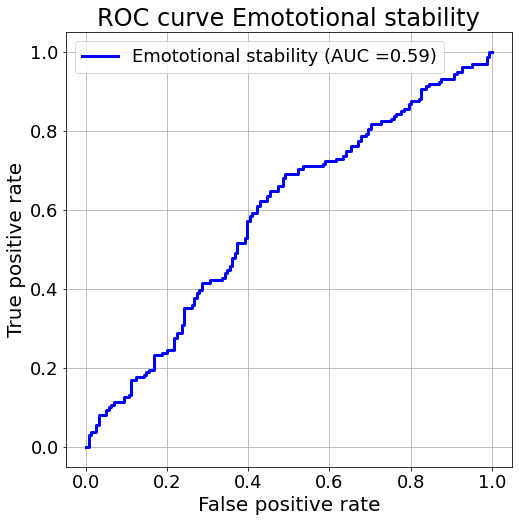

In [28]:
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="Emototional stability (AUC ="+str(np.round(auc,2))+")",color='blue',linewidth=3)
plt.xlabel('False positive rate',fontsize=20)
plt.ylabel('True positive rate',fontsize=20)
plt.title('ROC curve Emototional stability',fontsize=24)
plt.legend(loc="best",fontsize=18)
plt.tick_params(labelsize=18)
plt.grid()
plt.savefig('curva_ROC_Emototional.png')
plt.show()

In [0]:
np.savetxt("y_labels_Emot.txt",y_total) 
np.savetxt("z_total_Emot.txt",z_total) 
np.savetxt("y_scores_Emot.txt",y_scores)